# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from custom_lif import Stimulus, CustomLIFNeuron, plot_all
import ipywidgets as widgets
my_layout = widgets.Layout()

## LIF equation

\begin{equation}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\,
\end{equation}

where $V$ is the membrane potential, $g_L$ is the leak conductance, $E_L$ is the resting potential, $I$ is the external input current, and $\tau_m$ is membrane time constant.

### Stimulus

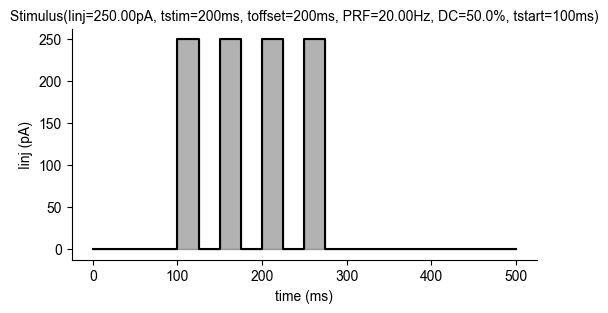

In [3]:
# Input current (pA)
Iinj = 250.

# Pulsing parameters
tstim = 200  # stimulation time (ms)
toffset = 200  # post-stimulation time (ms)
tstart = 100  # stimulation start time (ms)
PRF = 20.  # pulse repetition frequency (Hz)
DC = .5  # pulse duty cycle (-)

# Create stimulus object
s = Stimulus(Iinj, tstim, toffset, PRF, DC, tstart=tstart)

fig = s.plot()

### LIF model

In [4]:
lif = CustomLIFNeuron()

### Simulation

In [5]:
my_layout.width = '450px'
@widgets.interact(
    Iinj=widgets.FloatSlider(50., min=0., max=300., step=10., layout=my_layout),
    DC=widgets.FloatSlider(50., min=0., max=100., step=5., layout=my_layout),
    taum=widgets.FloatSlider(10., min=2., max=20., step=2., layout=my_layout)
)
def run_and_plot(Iinj, DC, taum):
    ''' Set stimulus input current and model time constant, simulate model, and plot results '''
    s.Iinj = Iinj
    s.DC = DC / 100.
    lif.taum = taum
    fig = plot_all(lif, s, *lif.simulate(s))
    plt.show()

interactive(children=(FloatSlider(value=50.0, description='Iinj', layout=Layout(width='450px'), max=300.0, ste…

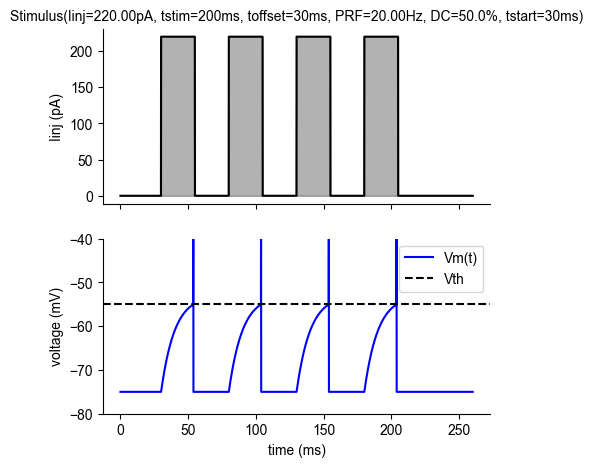

In [11]:
DC = 50.
Iinj = 220.
taum = 10.
s.Iinj = Iinj
s.DC = DC / 100.
s.tstart = 30.
s.toffset = 30.
lif.taum = taum
fig = plot_all(lif, s, *lif.simulate(s), figsize=(5, 5))